# Imports

In [1]:
import random
from math import sqrt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# I. Pi Approximation

## Pi Approximation – Variant 1

In [2]:
def pi_variant_1(r):
    inCount = 0
    rSquare = r * r

    for x in range(1, r + 1):
        xSquare = x * x
        for y in range(1, r + 1):
            ySquare = y * y
            if xSquare + ySquare <= rSquare:
                inCount += 1

    return 4 * (float(inCount) / rSquare)

## Pi Approximation – Variant 2

In [3]:
def pi_variant_2(n):
    inCount = 0

    for i in range(n):
        x = random.random()
        y = random.random()
        xSquare = x * x
        if sqrt(x**2 + y**2) < 1:
            inCount += 1

    return 4 * (float(inCount) / n)

## Pi Approximation – Variant 3

In [4]:
def pi_variant_3(r):
    inCount = 0
    rSquare = r * r

    for xInt in range(r + 1):
        x = xInt / r
        xSquare = x * x
        for yInt in range(r + 1):
            y = yInt / r
            ySquare = y * y
            if sqrt(xSquare + ySquare) <= 1:
                inCount += 1

    return 4 * (float(inCount) / rSquare)

## Pi Approximation – Growth Chart

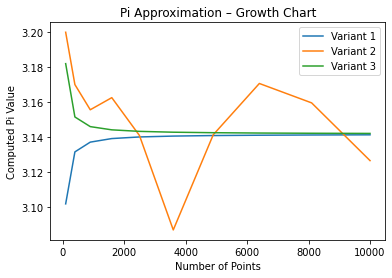

In [5]:
N = [100, 400, 900, 1600, 2500, 3600, 4900, 6400, 8100, 10000]
pv1_vals = []
pv2_vals = []
pv3_vals = []

for num in N:
    pv1_vals.append(pi_variant_1(num))
    pv2_vals.append(pi_variant_2(num))
    pv3_vals.append(pi_variant_3(num))

fig, ax = plt.subplots()
ax.plot(N, pv1_vals, label='Variant 1')
ax.plot(N, pv2_vals, label='Variant 2')
ax.plot(N, pv3_vals, label='Variant 3')
ax.legend(loc='upper right')
plt.title('Pi Approximation – Growth Chart')
plt.xlabel('Number of Points')
plt.ylabel('Computed Pi Value')
plt.savefig('chart1.jpg')
plt.show()

# II. Fibonacci Sequence

## Scary Da Vinci Code

In [6]:
def fibo(num):
    global counter
    counter += 1
    if num <= 1:
        return num
    else:
        return fibo(num - 1) + fibo(num - 2)

## Fibonacci Sequence – Growth Chart

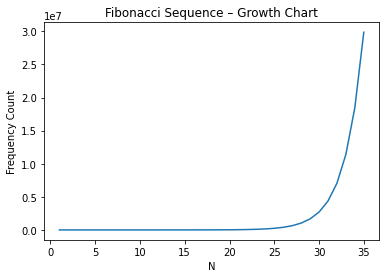

In [7]:
N = list(range(1, 36))
fibo_vals = []

for num in N:
    counter = 0
    num = fibo(num)
    fibo_vals.append(counter)
    
fig, ax = plt.subplots()
ax.plot(N, fibo_vals)
plt.title('Fibonacci Sequence – Growth Chart')
plt.xlabel('N')
plt.ylabel('Frequency Count')
plt.savefig('chart2.jpg')
plt.show()

# III. Search Algorithms

## Linear Search

In [8]:
def linearSearch(arr, num):
    global counter
    for i in range(len(arr)):
        counter += 1
        if(arr[i] == num):
            return i
    return -1

## Binary Search

In [9]:
def binarySearch(arr, num):
    global counter
    start = 0
    end = len(arr) - 1
    
    while start <= end:
        counter += 1
        mid = start + (end - start) // 2
        if num == arr[mid]:
            return mid
        elif num < arr[mid]:
            end = mid - 1
        elif num > arr[mid]:
            start = mid + 1
            
    return -1

## Search Algorithms – Growth Chart

In [10]:
data_random = pd.read_excel('./data.xlsx', sheet_name='Random', header=None)
data_random = data_random[0].to_list()

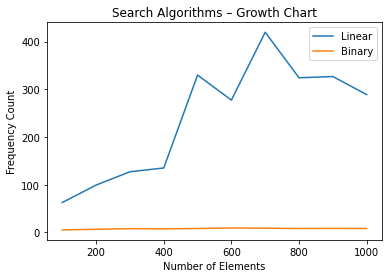

In [11]:
N = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
linear_vals = [0] * 10
binary_vals = [0] * 10

for i in range(len(N)):
    arr = data_random[:N[i]]
    
    for j in range(5):
        num = random.choice(arr)
        counter = 0
        _ = linearSearch(arr, num)
        linear_vals[i] += counter
        
    linear_vals[i] = linear_vals[i] / 5

for i in range(len(N)):
    arr = data_random[:N[i]]
    arr.sort()
    
    for j in range(5):
        num = random.choice(arr)
        counter = 0
        _ = binarySearch(arr, num)
        binary_vals[i] += counter
        
    binary_vals[i] = binary_vals[i] / 5

fig, ax = plt.subplots()
ax.plot(N, linear_vals, label='Linear')
ax.plot(N, binary_vals, label='Binary')
ax.legend(loc='upper right')
plt.title('Search Algorithms – Growth Chart')
plt.xlabel('Number of Elements')
plt.ylabel('Frequency Count')
plt.savefig('chart3.jpg')
plt.show()

# IV. Sorting Algorithms

## Import Data

In [12]:
data_random = pd.read_excel('./data.xlsx', sheet_name='Random', header=None)
data_random = data_random[0].to_list()

In [13]:
data_realistic = pd.read_excel('./data.xlsx', sheet_name='Realistic', header=None)
data_realistic = data_realistic[0].to_list()

In [14]:
data_contrived = pd.read_excel('./data.xlsx', sheet_name='Contrived', header=None)
data_contrived = data_contrived[0].to_list()

## Basic Sorting Algorithms

### Insertion Sort

In [15]:
def insertionSort(arr):
    global counter
    for j in range(1, len(arr)):
        key = arr[j]
        i = j - 1
        while i >= 0 and arr[i] > key:
            counter += 1
            arr[i + 1] = arr[i]
            i -= 1
        arr[i + 1] = key

    return arr

### Bubble Sort

In [16]:
def bubbleSort(arr):
    global counter
    for i in range(len(arr), 0, -1):
        for j in range(1, len(arr)):
            counter += 1
            if arr[j - 1] > arr[j]:
                arr[j], arr[j - 1] = arr[j - 1], arr[j]
                
    return arr

### Selection Sort

In [17]:
def selectionSort(arr):
    global counter
    for i in range(len(arr)):
        min = i
        for j in range(i + 1, len(arr)):
            counter += 1
            if arr[j] < arr[min]:
                min = j
                  
        arr[i], arr[min] = arr[min], arr[i]

    return arr

### Basic Sorting Algorithms – Growth Chart for Random Data

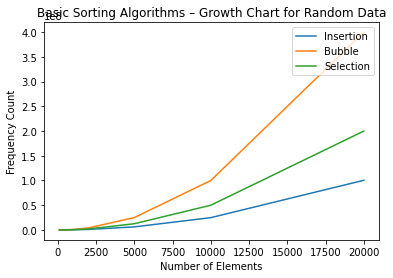

In [18]:
N = [100, 200, 500, 1000, 2000, 5000, 10000, 20000]

insertion_vals = []
bubble_vals = []
selection_vals = []

for num in N:
    idxs = 100000 // num
    data = data_random[idxs-1::idxs]
    counter = 0
    _ = insertionSort(data)
    insertion_vals.append(counter)
    counter = 0
    _ = bubbleSort(data)
    bubble_vals.append(counter)
    counter = 0
    _ = selectionSort(data)
    selection_vals.append(counter)
    
fig, ax = plt.subplots()
ax.plot(N, insertion_vals, label='Insertion')
ax.plot(N, bubble_vals, label='Bubble')
ax.plot(N, selection_vals, label='Selection')
ax.legend(loc='upper right')
plt.title('Basic Sorting Algorithms – Growth Chart for Random Data')
plt.xlabel('Number of Elements')
plt.ylabel('Frequency Count')
plt.savefig('chart4.jpg')
plt.show()

### Basic Sorting Algorithms – Growth Chart for Realistic Data

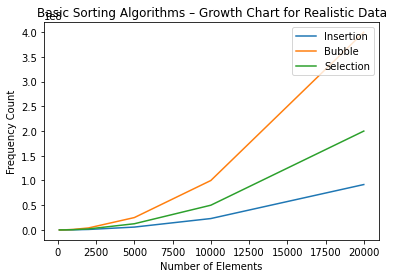

In [19]:
N = [100, 200, 500, 1000, 2000, 5000, 10000, 20000]

insertion_vals = []
bubble_vals = []
selection_vals = []

for num in N:
    idxs = 100000 // num
    data = data_realistic[idxs-1::idxs]
    counter = 0
    _ = insertionSort(data)
    insertion_vals.append(counter)
    counter = 0
    _ = bubbleSort(data)
    bubble_vals.append(counter)
    counter = 0
    _ = selectionSort(data)
    selection_vals.append(counter)
    
fig, ax = plt.subplots()
ax.plot(N, insertion_vals, label='Insertion')
ax.plot(N, bubble_vals, label='Bubble')
ax.plot(N, selection_vals, label='Selection')
ax.legend(loc='upper right')
plt.title('Basic Sorting Algorithms – Growth Chart for Realistic Data')
plt.xlabel('Number of Elements')
plt.ylabel('Frequency Count')
plt.savefig('chart5.jpg')
plt.show()

### Basic Sorting Algorithms – Growth Chart for Contrived Data

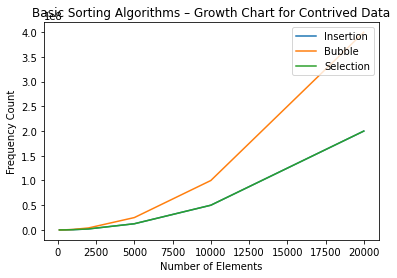

In [20]:
N = [100, 200, 500, 1000, 2000, 5000, 10000, 20000]

insertion_vals = []
bubble_vals = []
selection_vals = []

for num in N:
    idxs = 100000 // num
    data = data_contrived[idxs-1::idxs]
    counter = 0
    _ = insertionSort(data)
    insertion_vals.append(counter)
    counter = 0
    _ = bubbleSort(data)
    bubble_vals.append(counter)
    counter = 0
    _ = selectionSort(data)
    selection_vals.append(counter)
    
fig, ax = plt.subplots()
ax.plot(N, insertion_vals, label='Insertion')
ax.plot(N, bubble_vals, label='Bubble')
ax.plot(N, selection_vals, label='Selection')
ax.legend(loc='upper right')
plt.title('Basic Sorting Algorithms – Growth Chart for Contrived Data')
plt.xlabel('Number of Elements')
plt.ylabel('Frequency Count')
plt.savefig('chart6.jpg')
plt.show()

## Advanced Sorting Algorithms

### Quick Sort

In [21]:
def quickSort(arr, low, high):
    if low < high: 
        pi = partition(arr, low, high) 

        quickSort(arr, low, pi - 1) 
        quickSort(arr, pi + 1, high)
        
    else:
        return arr

def partition(arr, low, high):
    global counter
    i = (low - 1)
    pivot = arr[high]

    for j in range(low, high): 
        if arr[j] <= pivot:
            counter += 1
            i = i + 1 
            arr[i], arr[j] = arr[j], arr[i] 

    arr[i+1], arr[high] = arr[high], arr[i+1] 
    
    return (i + 1) 

### Merge Sort

In [22]:
def mergeSort(arr):
    if len(arr) <= 1:
        return arr
    
    mid = len(arr) // 2
    left = mergeSort(arr[:mid])
    right = mergeSort(arr[mid:])
    return merge(left, right)


def merge(left, right):
    global counter
    if not left:
        counter += 1
        return right
    if not right:
        counter += 1
        return left
    if left[0] < right[0]:
        counter += 1
        return [left[0]] + merge(left[1:], right)
    return [right[0]] + merge(left, right[1:])

### Shell Sort

In [23]:
def shellSort(arr):
    global counter
    interval = len(arr) // 2
    interval = int(interval)
    while interval > 0:
        for i in range(interval, len(arr)):
            counter += 1
            temp = arr[i]
            j = i
            while j >= interval and arr[j - interval] > temp:
                arr[j] = arr[j - interval]
                j -= interval
            arr[j] = temp
        interval //= 2

    return arr

### Advanced Sorting Algorithms – Growth Chart for Random Data

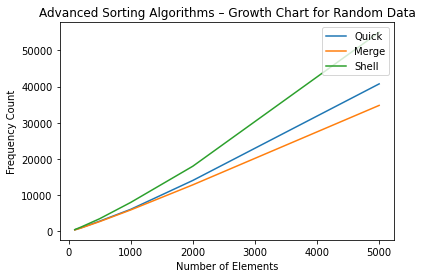

In [24]:
N = [100, 200, 500, 1000, 2000, 5000]

quick_vals = []
merge_vals = []
shell_vals = []

for num in N:
    idxs = 100000 // num
    data = data_random[idxs-1::idxs]
    counter = 0
    _ = quickSort(data, 0, len(data) - 1)
    quick_vals.append(counter)
    counter = 0
    _ = mergeSort(data)
    merge_vals.append(counter)
    counter = 0
    _ = shellSort(data)
    shell_vals.append(counter)
    
fig, ax = plt.subplots()
ax.plot(N, quick_vals, label='Quick')
ax.plot(N, merge_vals, label='Merge')
ax.plot(N, shell_vals, label='Shell')
ax.legend(loc='upper right')
plt.title('Advanced Sorting Algorithms – Growth Chart for Random Data')
plt.xlabel('Number of Elements')
plt.ylabel('Frequency Count')
plt.savefig('chart7.jpg')
plt.show()

### Advanced Sorting Algorithms – Growth Chart for Realistic Data

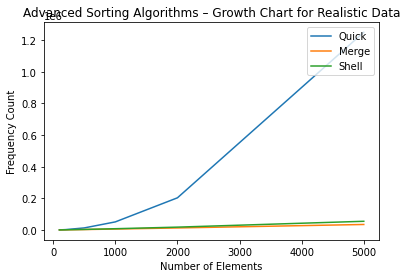

In [25]:
N = [100, 200, 500, 1000, 2000, 5000]

quick_vals = []
merge_vals = []
shell_vals = []

for num in N:
    idxs = 100000 // num
    data = data_realistic[idxs-1::idxs]
    counter = 0
    _ = quickSort(data, 0, len(data) - 1)
    quick_vals.append(counter)
    counter = 0
    _ = mergeSort(data)
    merge_vals.append(counter)
    counter = 0
    _ = shellSort(data)
    shell_vals.append(counter)
    
fig, ax = plt.subplots()
ax.plot(N, quick_vals, label='Quick')
ax.plot(N, merge_vals, label='Merge')
ax.plot(N, shell_vals, label='Shell')
ax.legend(loc='upper right')
plt.title('Advanced Sorting Algorithms – Growth Chart for Realistic Data')
plt.xlabel('Number of Elements')
plt.ylabel('Frequency Count')
plt.savefig('chart8.jpg')
plt.show()

### Advanced Sorting Algorithms – Growth Chart for Contrived Data

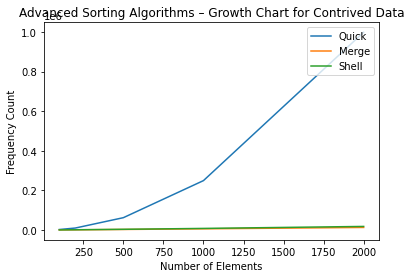

In [26]:
N = [100, 200, 500, 1000, 2000]

quick_vals = []
merge_vals = []
shell_vals = []

for num in N:
    idxs = 100000 // num
    data = data_contrived[idxs-1::idxs]
    counter = 0
    _ = quickSort(data, 0, len(data) - 1)
    quick_vals.append(counter)
    counter = 0
    _ = mergeSort(data)
    merge_vals.append(counter)
    counter = 0
    _ = shellSort(data)
    shell_vals.append(counter)
    
fig, ax = plt.subplots()
ax.plot(N, quick_vals, label='Quick')
ax.plot(N, merge_vals, label='Merge')
ax.plot(N, shell_vals, label='Shell')
ax.legend(loc='upper right')
plt.title('Advanced Sorting Algorithms – Growth Chart for Contrived Data')
plt.xlabel('Number of Elements')
plt.ylabel('Frequency Count')
plt.savefig('chart9.jpg')
plt.show()